<center><h1 style="color:red;" >Analysis of AirBnb Data</h1></center>

# Introduction

<p>AirBnb is one of the fastest growing companies. It provides a service where hosts with spare rooms can rent them out to guests and collects a comission. More details about the company can be found at <a href="https://www.airbnb.com/">https://www.airbnb.com/</a> </p>.
<p>Our interest is finding out what their data can tell us. What insights we can get and if this insights can help other businesses in the same industry space like travel etc.</p>

the data used has been got from <a href="https://www.kaggle.com/maxbaas/airbnb">kaggle</a>

<h3>loading the data</h3>
<p>The data is in a csv file we will be using pandas library to read the csv file.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('airbnb.csv')

after loading the data we can peek at it to see what we are working with and also get a brief description

In [3]:
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
data.shape

(213451, 16)

<h3>Cleaning the data</h3>
<p>Data in the wild is naturaly dirty. Before we can do meaningful analysis we need to clean it. We can start by addressing missing entries</p>

In [5]:
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

The missing values for the age can be addressed by getting an average age based on the persons gender. Then filling the missing gaps. It is also important to note that  age was a user generated input therefore we can assume some entries are not factual such as someone entering the calendar year rather than their age for example.

In [6]:
data['age'].max()

2014.0

In [7]:
data['age'].min()

1.0

we know that there is no one in the world who's 2014 years. Such values can mess up our analysis to correct this we can remove the entries where age is more than 100 years and less than 16

In [8]:
len(data[data['age']>90]['age'])

2543

In [9]:
data = data.drop(data[(data.age>90) | (data.age<16)].index)

we can now fill in the missing ages

[['-unknown-', 'MALE', 'OTHER', 'FEMALE'], gender
 -unknown-    36.902054
 FEMALE       36.131111
 MALE         36.701572
 OTHER        36.888889
 Name: age, dtype: float64]

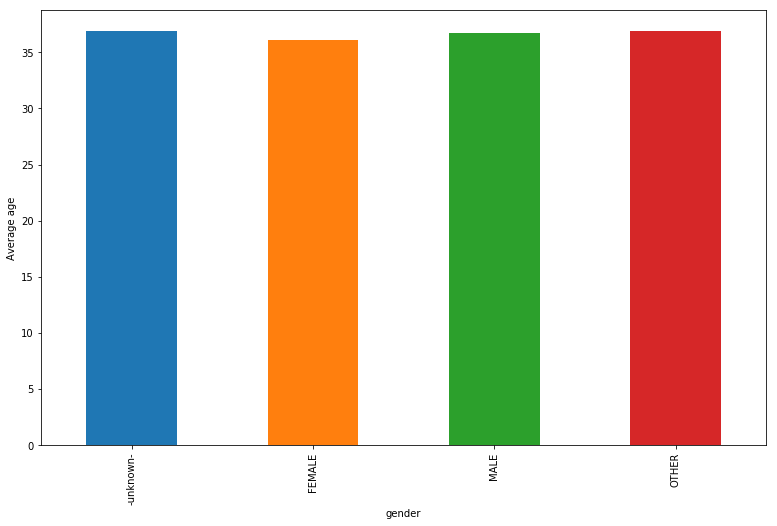

In [10]:
ax = plt.subplot()
ax.set_ylabel('Average age')
data.groupby('gender').mean()['age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(data.gender)))  #set for unique values of the title, and transform into list
title_mean_age.append(data.groupby('gender').age.mean())
title_mean_age

In [11]:
data.reset_index(drop=True, inplace=True)


In [12]:
data.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
210838,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
210839,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
210840,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
210841,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
210842,nw9fwlyb5f,2014-06-30,20140630235824,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [13]:
'''n_traning= data.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(data.age[i])==True:
        for j in range(0, n_titles):
            if data.gender[i] == title_mean_age[0][j]:
                data.age[i] = title_mean_age[1][j]
                '''

'n_traning= data.shape[0]   #number of rows\nn_titles= len(title_mean_age[1])\nfor i in range(0, n_traning):\n    if np.isnan(data.age[i])==True:\n        for j in range(0, n_titles):\n            if data.gender[i] == title_mean_age[0][j]:\n                data.age[i] = title_mean_age[1][j]\n                '

This step above takes alot of time and computation power. I ran it once and saved the new with the ages filled out.
we will load it and use it from here so as not to run the above code everytime we restart the kernel. You can comment the next block out.

In [14]:
dataset=pd.read_csv('airbnb3.csv')

we will be droping data_first_booking amd first_affiliate_tracked as there is no way of filling the missing values.

In [15]:
dataset.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,36.888889,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [16]:
dataset = dataset.drop(['date_first_booking', 'first_affiliate_tracked'], axis=1)

In [17]:
dataset.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
0,0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,36.888889,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,NDF
1,1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.000000,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.000000,basic,3,en,direct,direct,Web,Windows Desktop,IE,US
3,3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.000000,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,other
4,4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.000000,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,US


In [18]:
dataset.isnull().sum()


Unnamed: 0                0
id                        0
date_account_created      0
timestamp_first_active    0
gender                    0
age                       0
signup_method             0
signup_flow               0
language                  0
affiliate_channel         0
affiliate_provider        0
signup_app                0
first_device_type         0
first_browser             0
country_destination       0
dtype: int64

<p>With no empty values we can start analysis of the data.</p>
<h4>Analysis of gender and age.</h4>

<function matplotlib.pyplot.show(*args, **kw)>

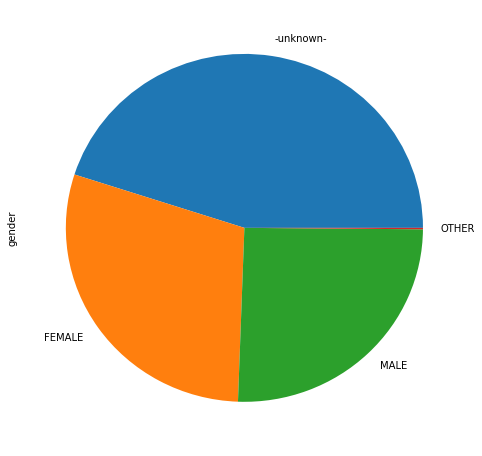

In [19]:
plt.figure(figsize=(8,8))
dataset.gender.value_counts().plot(kind='pie')

plt.show

In [20]:
dataset['gender'].value_counts(normalize=True)*100

-unknown-    45.036354
FEMALE       29.390115
MALE         25.441205
OTHER         0.132326
Name: gender, dtype: float64

<p>From the graph and the percentages we can see that a 45% of the people did not share their gender. This may be due to some factors such as not finding the field useful or they did not identify as being male or female and opted not to fill it. There is no definitive reason why close to half of the users opted not fill the we can only make assumptions.</p>

In [21]:
dataset[dataset['gender']=='-unknown-']['age'].mean()

36.8911226720212

In [22]:
dataset[dataset['gender']=='-unknown-']['age'].min()

17.0

<p>The average age of the gender unknown is 36 years, this the millenials If we were to build an app targeted at this generation that is similar to Airbnb it would be advisible not to include gender as most of them wouldn't fill it.</p>

<p>The minority gender in this case is those that identify as other. This group mainly comprises of the LGBTQA community</p>

In [23]:
dataset[dataset['gender']=='OTHER']['age'].mean()

36.891437071089925

It is important to note that the mean age of other and that of unknown are very similar. Base on this we can assume that milenials don't like filling in their gender.

From the percentages more women at 29% than men at 25% use airbnb.

In [24]:
print("The mean age of females using the service is")
dataset[dataset['gender']=='FEMALE']['age'].mean()

The mean age of females using the service is


36.13111107187627

In [25]:
print("The mean age of males using the service is")
dataset[dataset['gender']=='MALE']['age'].mean()

The mean age of males using the service is


36.70157183527808

In [26]:
dataset.age.mean()

36.619530788285054

From both male and females we can see that it's milenials who mostly use the service.
The grand mean of the ages  also shows this. 

<h4>Sign up method.</h4>
<p>So as to use the service one must sign up. Various apps offer different signup methods the common one being email, gmail, facebook and phone number. Let's seee the one widely used by Airbnb users.</p>

<function matplotlib.pyplot.show(*args, **kw)>

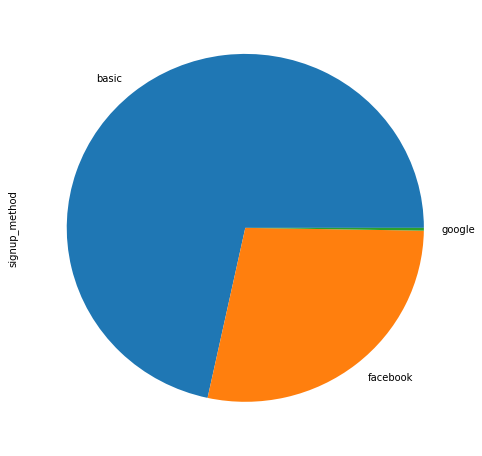

In [27]:
plt.figure(figsize=(8,8))
dataset.signup_method.value_counts().plot(kind='pie')

plt.show

In [28]:
dataset.signup_method.value_counts(normalize=True)*100

basic       71.611104
facebook    28.130410
google       0.258486
Name: signup_method, dtype: float64

In [29]:
dataset.timestamp_first_active.max()

20140630235824

The prefered signup method as of 2014 was email then facebook lastly google. currently(2018) users are opting to use google, facebook or twitter to sign up for services. This is due to the "One Click" sets everything up convenience.

<h3>Language</h3>

In [30]:
dataset.language.value_counts(normalize=True)*100

en    96.643948
zh     0.771664
fr     0.547801
es     0.429704
ko     0.350498
de     0.346703
it     0.239989
ru     0.182600
pt     0.112406
ja     0.105766
sv     0.057389
nl     0.045532
tr     0.030354
da     0.027509
pl     0.025611
cs     0.014703
no     0.014229
th     0.011383
el     0.011383
id     0.010434
hu     0.008063
fi     0.006640
ca     0.002371
is     0.002371
hr     0.000949
Name: language, dtype: float64

The predominat language is english then followed by the rest. We can attribute this to the where the app originated and also to the fact that is the second most spoken language in the world.
<br> Having english support for an app is important.

In [31]:
dataset.signup_app.value_counts(normalize=True)*100

Web        85.518609
iOS         8.970656
Moweb       2.937257
Android     2.573479
Name: signup_app, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

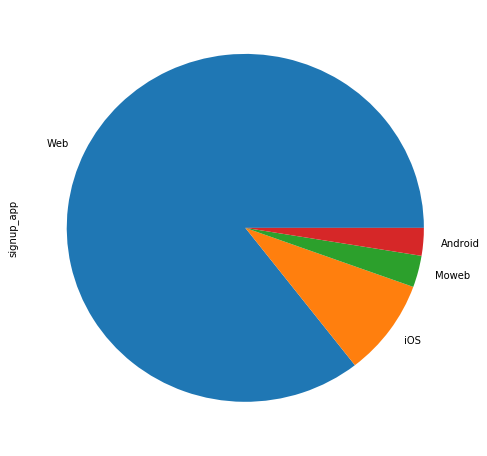

In [32]:
plt.figure(figsize=(8,8))
dataset.signup_app.value_counts().plot(kind='pie')

plt.show

85%  of the users used the web to signup. When building a service it is important to have a "web app"  . people on various platforms can use it before you work on the native apps for the different devices.